In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import pandas as pd

iris= pd.read_csv("iris.csv", names=["Sepal Length", "Sepal Width", "Petal length", "Petal width","Class"])
iris.sample(n=10)

,Sepal Length,Sepal Width,Petal length,Petal width,Class
65,6.7,3.1,4.4,1.4,Iris-versicolor
25,5.0,3.0,1.6,0.2,Iris-setosa
96,5.7,2.9,4.2,1.3,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
84,5.4,3.0,4.5,1.5,Iris-versicolor
118,7.7,2.6,6.9,2.3,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
91,6.1,3.0,4.6,1.4,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
92,5.8,2.6,4.0,1.2,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [3]:
iris.describe()

,Sepal Length,Sepal Width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info() #No missing/null/zero values were found, no need to replace any value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal length    150 non-null float64
Petal width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [5]:
# Transform into binary variables
iris_dum = pd.get_dummies(iris, drop_first=False)
iris_dum.sample(10)

,Sepal Length,Sepal Width,Petal length,Petal width,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
104,6.5,3.0,5.8,2.2,0,0,1
59,5.2,2.7,3.9,1.4,0,1,0
111,6.4,2.7,5.3,1.9,0,0,1
90,5.5,2.6,4.4,1.2,0,1,0
11,4.8,3.4,1.6,0.2,1,0,0
108,6.7,2.5,5.8,1.8,0,0,1
142,5.8,2.7,5.1,1.9,0,0,1
37,4.9,3.1,1.5,0.1,1,0,0
12,4.8,3.0,1.4,0.1,1,0,0
128,6.4,2.8,5.6,2.1,0,0,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [6]:
iris_dum.corr()

#though some features fully dont classify a certain type 
#but is strongly correlated to another classification, therefore not dropping any feature

,Sepal Length,Sepal Width,Petal length,Petal width,Class_Iris-setosa,Class_Iris-versicolor,Class_Iris-virginica
Sepal Length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
Petal length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
Petal width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134
Class_Iris-setosa,-0.717416,0.595601,-0.922688,-0.887510,1.000000,-0.500000,-0.500000
Class_Iris-versicolor,0.079396,-0.464700,0.201587,0.118376,-0.500000,1.000000,-0.500000
Class_Iris-virginica,0.638020,-0.130901,0.721102,0.769134,-0.500000,-0.500000,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [7]:
#All the features contributes to classifying atleast one category, hence not dropping any column.

## Question 6

*Plot the scatter matrix for all the variables.*

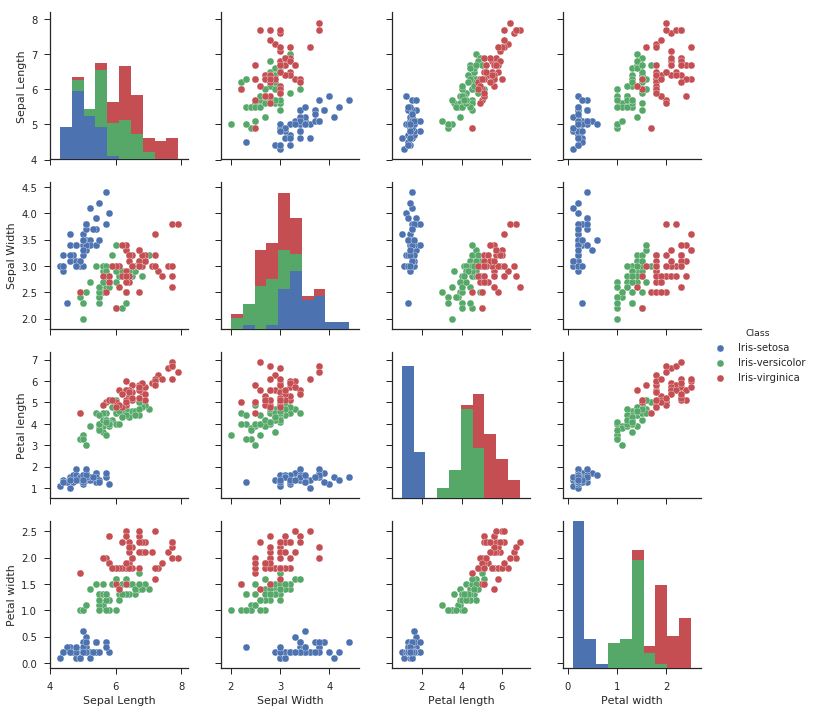

In [8]:
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

sns.pairplot(iris, hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [9]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

feature_cols = ['Sepal Length', 'Sepal Width', 'Petal length', 'Petal width']  # Features
feature_outcome = ['Class_Iris-setosa', 'Class_Iris-versicolor', 'Class_Iris-virginica'] # Target variable

X = iris_dum[feature_cols] # Features
y = iris_dum[feature_outcome] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
iris_dum.columns

Index(['Sepal Length', 'Sepal Width', 'Petal length', 'Petal width',
       'Class_Iris-setosa', 'Class_Iris-versicolor', 'Class_Iris-virginica'],
      dtype='object')

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [11]:
NNH3 = KNeighborsClassifier(n_neighbors= 3)
NNH5 = KNeighborsClassifier(n_neighbors= 5)
NNH7 = KNeighborsClassifier(n_neighbors= 7)
NNH9 = KNeighborsClassifier(n_neighbors= 9)

NNH3.fit(X_train, y_train)
predicted_labels3 = NNH3.predict(X_test)
print('When N=3',NNH3.score(X_test, y_test))

NNH5.fit(X_train, y_train)
predicted_labels5 = NNH5.predict(X_test)
print('When N=5',NNH5.score(X_test, y_test))

NNH7.fit(X_train, y_train)
predicted_labels7 = NNH7.predict(X_test)
print('When N=7',NNH7.score(X_test, y_test))

NNH9.fit(X_train, y_train)
predicted_labels9 = NNH9.predict(X_test)
print('When N=9',NNH9.score(X_test, y_test))


When N=3 1.0
When N=5 1.0
When N=7 0.9666666666666667
When N=9 0.9666666666666667


In [12]:
#checking only for K= 9
ypred=predicted_labels9
#print(ypred)
ytest =y_test.values
#print(yval)

sklearn.metrics.accuracy_score(ytest, ypred, normalize=True, sample_weight=None)


0.9666666666666667

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:


Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [13]:
nval=[]
mse =[]
for x in range(3, 20, 2):
    nval.append(x)
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    mse.append(1-NNH.score(X_test, y_test))
    
print ('Here is N values:', nval)
print('Here is MSE values: ', mse)



Here is N values: [3, 5, 7, 9, 11, 13, 15, 17, 19]
Here is MSE values:  [0.0, 0.0, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

myList =[]
for i in range(1,20,2):
    myList.append(i)

# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 7


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

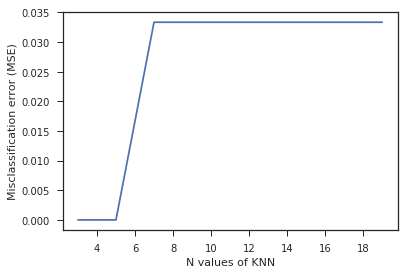

In [15]:
import matplotlib.pyplot as plt
plt.plot(nval,mse)
plt.ylabel('Misclassification error (MSE)')
plt.xlabel('N values of KNN')

plt.show()

# Naive Bayes with Iris Data

In [16]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [17]:
iris.sample(5)

,Sepal Length,Sepal Width,Petal length,Petal width,Class
103,6.3,2.9,5.6,1.8,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
26,5.0,3.4,1.6,0.4,Iris-setosa
138,6.0,3.0,4.8,1.8,Iris-virginica


In [18]:
X = ['Sepal Length', 'Sepal Width', 'Petal length', 'Petal width']  # Features
y = ['Class']

X = iris[X] # Features
y = iris[y] # Target variable

In [19]:
#Check the dataset
print(y)
print(X)

              Class
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
6       Iris-setosa
7       Iris-setosa
8       Iris-setosa
9       Iris-setosa
10      Iris-setosa
11      Iris-setosa
12      Iris-setosa
13      Iris-setosa
14      Iris-setosa
15      Iris-setosa
16      Iris-setosa
17      Iris-setosa
18      Iris-setosa
19      Iris-setosa
20      Iris-setosa
21      Iris-setosa
22      Iris-setosa
23      Iris-setosa
24      Iris-setosa
25      Iris-setosa
26      Iris-setosa
27      Iris-setosa
28      Iris-setosa
29      Iris-setosa
..              ...
120  Iris-virginica
121  Iris-virginica
122  Iris-virginica
123  Iris-virginica
124  Iris-virginica
125  Iris-virginica
126  Iris-virginica
127  Iris-virginica
128  Iris-virginica
129  Iris-virginica
130  Iris-virginica
131  Iris-virginica
132  Iris-virginica
133  Iris-virginica
134  Iris-virginica
135  Iris-virginica
136  Iris-virginica
137  Iris-virginica


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

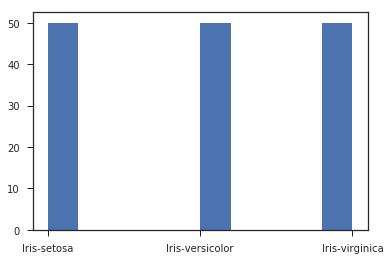

In [20]:
plt.hist(iris.Class)

In [21]:
iris

,Sepal Length,Sepal Width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [22]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [23]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [24]:
iris.corr()

#1. Petal Length and Petal Width has the highest correlation. It has a positive correlation i.e. directly proportional
#2. Sepal Length and Sepal Width are least correlated.
#3. Petal Length nad Sepal length also has high correlation.

,Sepal Length,Sepal Width,Petal length,Petal width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


### Split data in Training and test set in 80:20.

In [25]:
#iris_dum1 = pd.get_dummies(iris, drop_first=False)
#iris_dum1.head()


In [26]:
feature_cols = ['Sepal Length', 'Sepal Width', 'Petal length', 'Petal width']  # Features
feature_outcome = ['Class'] # Target variable

#X = iris_dum1[feature_cols] # Features
#y = iris_dum1[feature_outcome] # Target variable

X = iris[feature_cols] # Features
y = iris[feature_outcome] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Question 13 
Do Feature Scaling 

In [27]:
# Use StandardScaler or similar methods

#here scaling is not required as all the features are in same scale, scaling function like z score or standard scalar 
#would not change anything.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
#X_train
#y_train

### Question 14 
Train and Fit NaiveBayes Model

In [29]:
#Fit the model

from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [30]:
#Predict

expected = y_test
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [31]:
# show Confusion Matrix

print(metrics.confusion_matrix(expected, predicted))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [32]:
# show accuracy

#Precision: Within a given set of positively-labeled results, the fraction that were true positives = tp/(tp + fp) 
#Recall: Given a set of positively-labeled results, the fraction of all positives that were retrieved = tp/(tp + fn) 
#Accuracy: tp + tn / (tp + tn + fp +fn)

print('Accuracy', model.score(X_test,y_test))


Accuracy 0.9666666666666667


In [33]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

    avg / total       0.97      0.97      0.97        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [34]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [35]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [36]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [37]:
# use from sklearn.svm import SVC

In [38]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [39]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [40]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [41]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

NameError: name 'SVC' is not defined

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 